In [1]:
# import the necessary packages
from pyimagesearch.gradcam import GradCAM
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import matplotlib.pyplot as plt
import numpy as np
#import argparse
import imutils
import cv2
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=False,
#     help="path to the input image", default="beagle.jpg")
#ap.add_argument("-m", "--model", type=str, default="vgg",
#     choices=("vgg", "resnet"),
#     help="model to be used")
#args = vars(ap.parse_args())
args=dict()
args["model"] = 'vgg'
args["image"]="beagle.jpg"
#--image: The path to our input image
#--model: The deep learning model 

# initialize the model to be VGG16
Model = VGG16
# check to see if we are using ResNet
if args["model"] == "resnet":
     Model = ResNet50
# load the pre-trained CNN from disk
print("[INFO] loading model...")
model = Model(weights="imagenet")     


#args["image"] = 'beagle.jpg'

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(args["image"])
resized = cv2.resize(orig, (224, 224))
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img(args["image"], target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input image and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])
# decode the ImageNet predictions to obtain the human-readable label
decoded = imagenet_utils.decode_predictions(preds)
(imagenetID, label, prob) = decoded[0][0]
label = "{}: {:.2f}%".format(label, prob * 100)
print("[INFO] {}".format(label))


# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)
# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
     0.8, (255, 255, 255), 2)
# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([orig, heatmap, output])
output = imutils.resize(output, height=700)


[INFO] loading model...
[INFO] beagle: 44.26%


In [3]:
from PIL import Image
from IPython.display import display

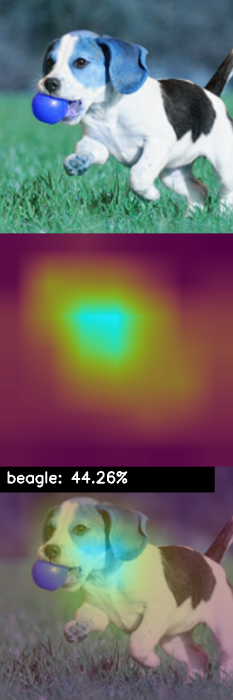

In [4]:
display(Image.fromarray(output))